In [2]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine = datasets.load_wine()
X = wine.data[:, [0, 10]]  # alcohol and hue features
y = wine.target

In [6]:
# Split data into training and test sets (60-40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=5, stratify=y
)

In [7]:
# Scale
# Initialize standard scaler and compute mean and stddev from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform both X_train and X_test with mean and stddev from training data
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

print("Mean of X_train_sc:", np.mean(X_train_sc, axis=0))
print("Stddev of X_train_sc:", np.std(X_train_sc, axis=0))

Mean of X_train_sc: [-2.48333848e-15 -8.38951550e-16]
Stddev of X_train_sc: [1. 1.]


In [10]:
# Initialize the model with specified parameters
ppn = Perceptron(max_iter=100, eta0=0.05, random_state=77)
ppn.fit(X_train_sc, y_train) # Train

Perceptron(eta0=0.05, max_iter=100, random_state=77)

In [11]:
# Predict classes for samples in test set and print number of misclassifications
y_pred = ppn.predict(X_test_sc)
print("Misclassified samples: {0}".format((y_test != y_pred).sum()))

Misclassified samples: 14


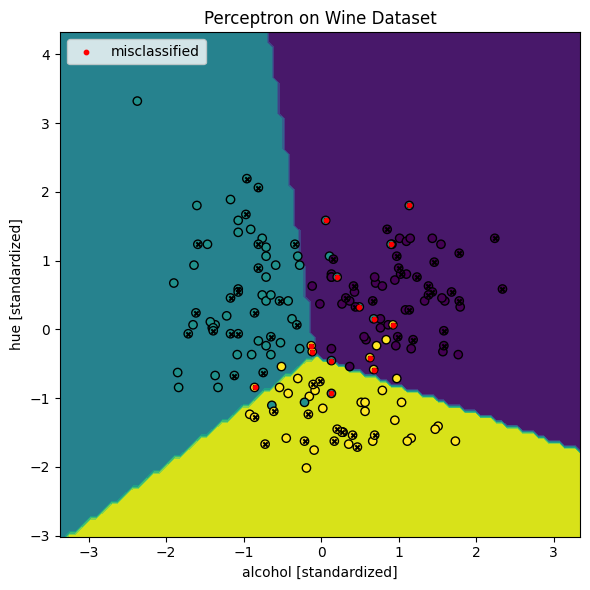

In [ ]:
# Plot

X_combined_sc = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plot = DecisionBoundaryDisplay.from_estimator(
    estimator=ppn,
    X=X_combined_sc,
    alpha=1.0,
    ax=ax,
    response_method="predict",
    xlabel="alcohol [standardized]",
    ylabel="hue [standardized]",
)

plot.ax_.scatter(X_combined_sc[:, 0], X_combined_sc[:, 1], c=y_combined, marker="o", edgecolor="k")

# Highlight test samples
plot.ax_.scatter(
    X_test_sc[:, 0],
    X_test_sc[:, 1],
    marker="x",
    s=10,
    c="k",
)

# Highlight misclassified test samples
plot.ax_.scatter(
    X_test_sc[y_test != y_pred, 0],
    X_test_sc[y_test != y_pred, 1],
    marker="o",
    s=10,
    c="r",
    facecolors="none",
    label="misclassified",
)

plt.legend(loc="upper left")
plt.title("Perceptron on Wine Dataset")
plt.tight_layout()
plt.show()

In [20]:

# 1. Test accuracy
test_accuracy = ppn.score(X_test_sc, y_test)
print(f"1. Test accuracy: {test_accuracy:.4f}")

# 2. Number of epochs (iterations) used during training
print(f"2. Number of epochs used: {ppn.n_iter_}")

# 3. Number of weight updates
print(f"3. Number of weight updates: {ppn.n_iter_}")

print("\nFinal Weights:\n", ppn.coef_)


1. Test accuracy: 0.8056
2. Number of epochs used: 8
3. Number of weight updates: 8

Final Weights:
 [[ 0.20203068  0.14754052]
 [-0.18198897  0.0986319 ]
 [ 0.06322375 -0.19879897]]
